In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [17]:
df = yf.download('AAPL', start = '2002-06-17', end='2023-10-04')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-06-17,0.361429,0.368393,0.354464,0.366786,0.311327,324609600
2002-06-18,0.364643,0.367679,0.356786,0.359821,0.305415,353360000
2002-06-19,0.310179,0.314286,0.301429,0.305714,0.259489,1709467200
2002-06-20,0.306607,0.314286,0.300893,0.305536,0.259338,396636800
2002-06-21,0.303036,0.312321,0.299821,0.300893,0.255397,445177600


In [18]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-27,172.619995,173.039993,169.050003,170.429993,170.429993,66921800
2023-09-28,169.339996,172.029999,167.619995,170.690002,170.690002,56294400
2023-09-29,172.020004,173.070007,170.339996,171.210007,171.210007,51814200
2023-10-02,171.220001,174.300003,170.929993,173.750000,173.750000,52164500
2023-10-03,172.259995,173.630005,170.820007,172.399994,172.399994,49594600


In [19]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-06-17,0.361429,0.368393,0.354464,0.366786,0.311327,324609600
1,2002-06-18,0.364643,0.367679,0.356786,0.359821,0.305415,353360000
2,2002-06-19,0.310179,0.314286,0.301429,0.305714,0.259489,1709467200
3,2002-06-20,0.306607,0.314286,0.300893,0.305536,0.259338,396636800
4,2002-06-21,0.303036,0.312321,0.299821,0.300893,0.255397,445177600


In [20]:
df = df.drop(['Date', 'Adj Close'],axis =1)
df.head()

,Open,High,Low,Close,Volume
0,0.361429,0.368393,0.354464,0.366786,324609600
1,0.364643,0.367679,0.356786,0.359821,353360000
2,0.310179,0.314286,0.301429,0.305714,1709467200
3,0.306607,0.314286,0.300893,0.305536,396636800
4,0.303036,0.312321,0.299821,0.300893,445177600


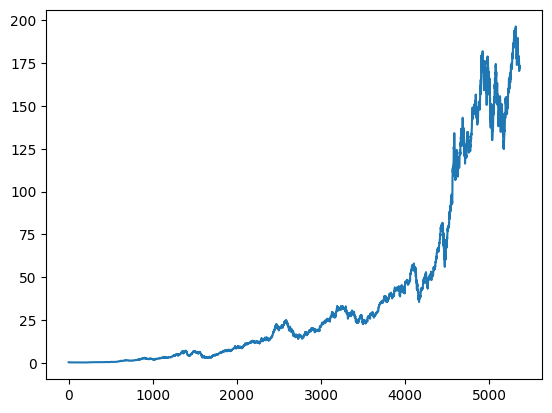

In [21]:
plt.plot(df.Close)

In [22]:
df

,Open,High,Low,Close,Volume
0,0.361429,0.368393,0.354464,0.366786,324609600
1,0.364643,0.367679,0.356786,0.359821,353360000
2,0.310179,0.314286,0.301429,0.305714,1709467200
3,0.306607,0.314286,0.300893,0.305536,396636800
4,0.303036,0.312321,0.299821,0.300893,445177600
...,...,...,...,...,...
5357,172.619995,173.039993,169.050003,170.429993,66921800
5358,169.339996,172.029999,167.619995,170.690002,56294400
5359,172.020004,173.070007,170.339996,171.210007,51814200
5360,171.220001,174.300003,170.929993,173.750000,52164500


In [25]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5357    182.075901
5358    182.047101
5359    182.024201
5360    182.044001
5361    182.032401
Name: Close, Length: 5362, dtype: float64

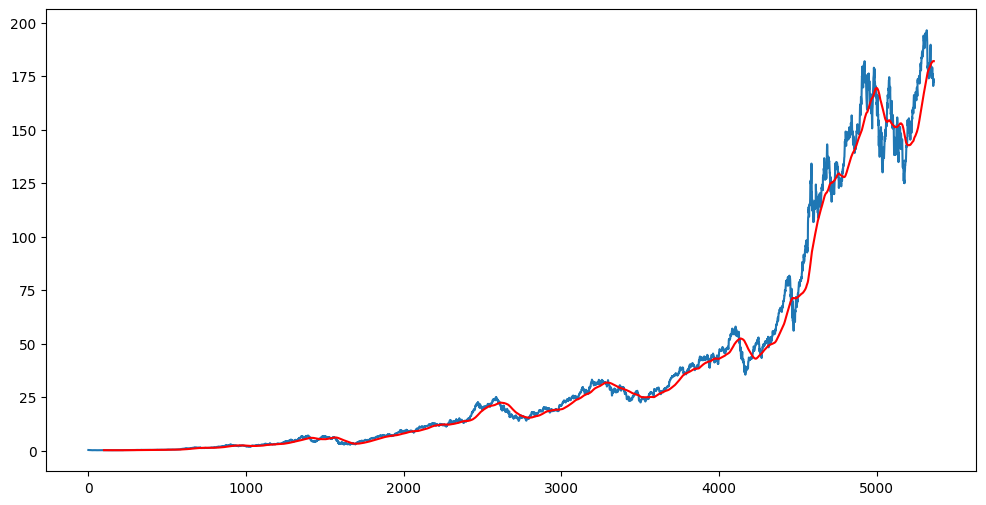

In [28]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [29]:
ma200 = df.Close.rolling(100).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5357    182.075901
5358    182.047101
5359    182.024201
5360    182.044001
5361    182.032401
Name: Close, Length: 5362, dtype: float64

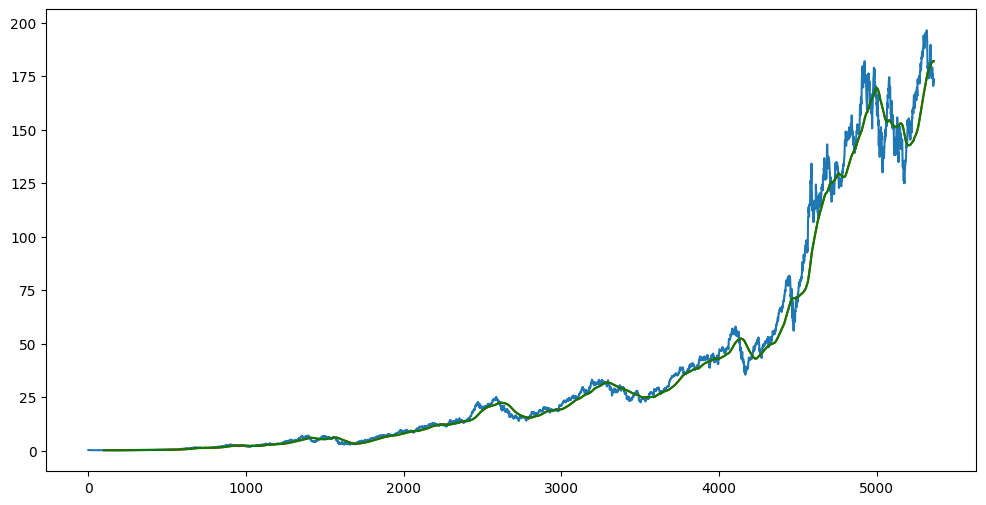

In [46]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [33]:
df.shape

(5362, 5)

In [34]:
#splitting Data into Training and testiing model

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3753, 1)
(1609, 1)


In [35]:
data_training.head()

,Close
0,0.366786
1,0.359821
2,0.305714
3,0.305536
4,0.300893


In [36]:
data_testing.head()

,Close
3753,39.025002
3754,38.924999
3755,38.867500
3756,37.562500
3757,38.134998


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00346286],
       [0.00328083],
       [0.00186675],
       ...,
       [1.        ],
       [0.99523033],
       [0.9997386 ]])

In [48]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#ML Model

In [52]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [53]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [56]:
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
115/115 [==============================] - 46s 340ms/step - loss: 0.0237
Epoch 2/50
115/115 [==============================] - 34s 292ms/step - loss: 0.0045
Epoch 3/50
115/115 [==============================] - 35s 301ms/step - loss: 0.0049
Epoch 4/50
115/115 [==============================] - 35s 304ms/step - loss: 0.0044
Epoch 5/50
115/115 [==============================] - 35s 305ms/step - loss: 0.0039
Epoch 6/50
115/115 [==============================] - 35s 303ms/step - loss: 0.0039
Epoch 7/50
115/115 [==============================] - 35s 302ms/step - loss: 0.0034
Epoch 8/50
115/115 [==============================] - 33s 290ms/step - loss: 0.0034
Epoch 9/50
115/115 [==============================] - 35s 301ms/step - loss: 0.0030
Epoch 10/50
115/115 [==============================] - 35s 305ms/step - loss: 0.0028
Epoch 11/50
115/115 [==============================] - 35s 306ms/step - loss: 0.0029
Epoch 12/50
115/115 [==============================] - 34s 295ms/step - lo

In [57]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
data_testing.head()

,Close
3753,39.025002
3754,38.924999
3755,38.867500
3756,37.562500
3757,38.134998


In [59]:
past_100_days = data_testing.tail(100)

In [60]:
final_df = past_100_days.append(data_testing, ignore_index= True)

<ipython-input-60-6ca3da9ae6a2>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index= True)


In [61]:
final_df.head()

,Close
0,173.750000
1,172.570007
2,172.070007
3,172.070007
4,172.690002


In [62]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.85892079],
       [0.8515872 ],
       [0.84847973],
       ...,
       [0.84313487],
       [0.85892079],
       [0.85053058]])

In [63]:
input_data.shape

(1709, 1)

In [84]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [85]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1609, 100, 1)
(1609,)


In [86]:
9#Making Predictions

y_predicted = model.predict (x_test)

51/51 [==============================] - 6s 108ms/step


In [87]:
y_predicted.shape

(1609, 1)

In [88]:
y_test

array([0.02161247, 0.02099096, 0.02063361, ..., 0.84313487, 0.85892079,
       0.85053058])

In [89]:
y_predicted

array([[0.86250466],
       [0.8480266 ],
       [0.82316417],
       ...,
       [0.87493086],
       [0.87126106],
       [0.866856  ]], dtype=float32)

In [90]:
scaler.scale_

array([0.00621494])

In [91]:
scale_factor = 1/0.00621494
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

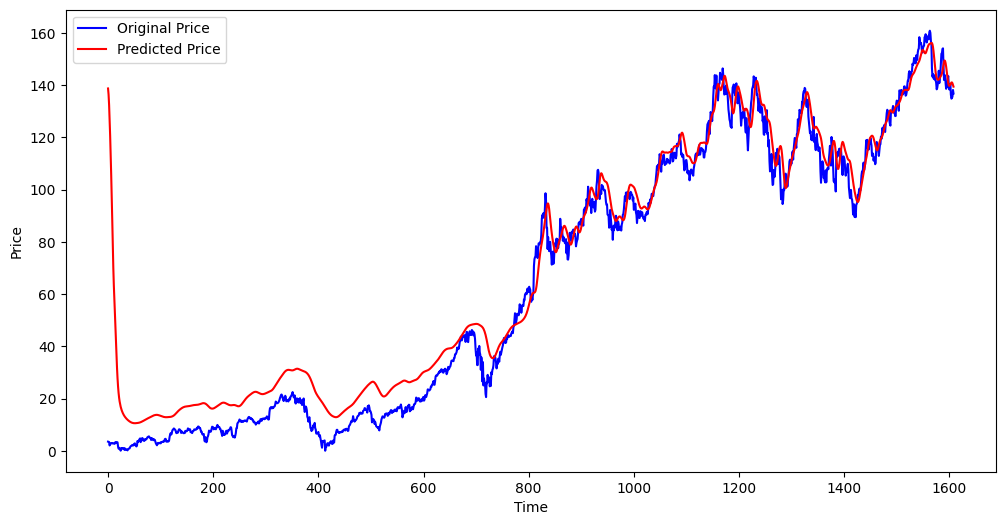

In [93]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show